In [15]:
import nltk.corpus
import string
import re , math
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import sys
os.chdir("/home/tanya/Desktop/major/spark")
os.curdir
if 'SPARK_HOME' not in os.environ:
    os.environ['SPARK_HOME']='/home/tanya/spark-2.0.0-bin-hadoop2.4'
SPARK_HOME=os.environ['SPARK_HOME']

sys.path.insert(0,os.path.join(SPARK_HOME,"python"))
sys.path.insert(0,os.path.join(SPARK_HOME,"python","lib"))
sys.path.insert(0,os.path.join(SPARK_HOME,"python","lib","pyspark.zip"))
sys.path.insert(0,os.path.join(SPARK_HOME,"python","lib","py4j-0.10.1-src.zip"))

from pyspark import SparkContext
from pyspark import SparkConf

conf=SparkConf()
conf.set("spark.executor.memory","1g")
conf.set("spark.cores.max","1")

conf.setAppName("major")

sc = SparkContext('local',conf=conf)



In [3]:
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [4]:
## after context eval rdd
def proc_change(x):
    l = str(x).split(",")
    #print l
    status = int((list(l[0])[11:][0]))
    #print status
    tid = int(l[1][5:])
    #print tid
    tweet = list(l[2])[9:]
    
    tweet.pop(len(tweet)-1)
    tweet.pop(len(tweet)-1)
    tweet=''.join(tweet)
    #print tweet
    return(Row(status=status,tid=tid,tweet=tweet))



In [5]:
## rdd containg adj_offensivee tweets
adj = sc.textFile("/home/tanya/Desktop/major/after_phase1/analyse/classifiers/rdd_files/adj_off.csv")
adj.count()
adj =adj.map(proc_change)
adj.count()

551

In [6]:
## rdd containg adj_clean tweets
adj_clean = sc.textFile("/home/tanya/Desktop/major/after_phase1/analyse/classifiers/rdd_files/adj_clean.csv")
adj_clean.count()
adj_clean =adj_clean.map(proc_change)
adj_clean.count()

1324

In [7]:
##calculating the parameters of adjective based approach
adj_fp = 0
adj_fn = 0
adj_tp = 0
adj_tn = 0
for x in adj.collect():
    if x.status == 0:
        adj_fp = adj_fp +1
    else:
        adj_tp = adj_tp+1

for x in adj_clean.collect():
    if x.status == 0:
        adj_tn = adj_tn +1
    else:
        adj_fn = adj_fn+1

print "tp " , adj_tp
print "tn " , adj_tn
print "fp " , adj_fp
print "fn " , adj_fn

tp  98
tn  1303
fp  453
fn  21


In [8]:
## calculating the accuracy of adjective based approaach
#1) PRECISION 
adj_precision = (adj_tp*100)/(adj_tp+adj_fp)
print "precision" , adj_precision ,"%"

#2) ACCURACY 
adj_accuracy = (adj_tp+adj_tn)*100/(adj_tp+adj_tn+adj_fp+adj_fn)
print "accuracy", adj_accuracy,"%"

#3)RECALL
adj_recall = (adj_tp*100)/(adj_tp+adj_fn)
print "recall", adj_recall,"%"

precision 17 %
accuracy 74 %
recall 82 %


In [9]:
## for cos offensive

In [10]:
## rdd containg cos_offensivee tweets
cos = sc.textFile("/home/tanya/Desktop/major/after_phase1/analyse/classifiers/rdd_files/cos_offensive.csv")
cos.count()
cos = cos.map(proc_change)
cos.count()

52

In [11]:
## rdd containg cos_offensivee tweets
cos_clean = sc.textFile("/home/tanya/Desktop/major/after_phase1/analyse/classifiers/rdd_files/cos_clean.csv")
cos_clean.count()
cos_clean = cos_clean.map(proc_change)
cos_clean.count()

1833

In [16]:
##calculating the parameters of cos based approach
cos_fp = 0
cos_fn = 0
cos_tp = 0
cos_tn = 0
for x in cos.collect():
    if x.status == 0:
        cos_fp = cos_fp +1
    else:
        cos_tp = cos_tp+1

for x in adj_clean.collect():
    if x.status == 0:
        cos_tn = cos_tn +1
    else:
        cos_fn = cos_fn+1


In [13]:
## calculating the accuracy of cos based approaach
#1) PRECISION 
cos_precision = (cos_tp*100)/(cos_tp+cos_fp)
print "precision" , cos_precision ,"%"

#2) ACCURACY 
cos_accuracy = (cos_tp+cos_tn)*100/(cos_tp+cos_tn+cos_fp+cos_fn)
print "accuracy", cos_accuracy,"%"

#3)RECALL
cos_recall = (cos_tp*100)/(cos_tp+cos_fn)
print "recall", cos_recall,"%"

precision 7 %
accuracy 94 %
recall 16 %


In [ ]:
### analysing the results 

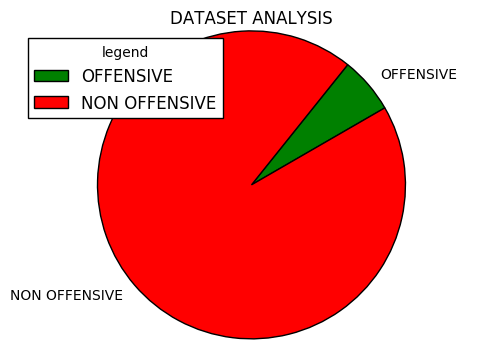

In [14]:
## dataset 
sizes=[5.92,94.08] #sum of all the elements should be 100
colors=['green','red']
labels=['OFFENSIVE','NON OFFENSIVE']
plt.pie(sizes,colors=colors,startangle=30,labels=labels)
plt.axis('equal') #to make a proper circle
plt.title('DATASET ANALYSIS')
plt.legend(title='legend',loc='best')
plt.show()

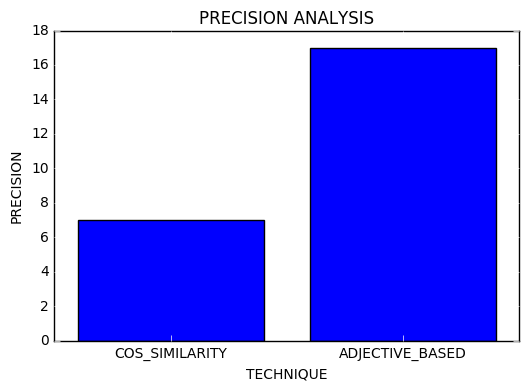

In [90]:
# 1) in terms of precision
#bar graph
import numpy as np
pos=np.arange(2)+1
years=["COS_SIMILARITY", "ADJECTIVE_BASED"]
plt.bar(pos,(cos_precision,adj_precision),align='center',color='blue')
plt.xlabel('TECHNIQUE')
plt.ylabel('PRECISION')
plt.title('PRECISION ANALYSIS')
plt.tick_params(axis='x',color='white')
plt.tick_params(axis='y',color='white')
plt.xticks(pos,years)
 
plt.show()



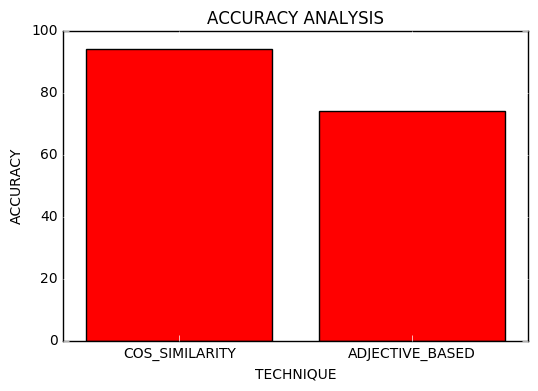

In [92]:
# 1) in terms of precision
#bar graph
import numpy as np
pos=np.arange(2)+1
years=["COS_SIMILARITY", "ADJECTIVE_BASED"]
plt.bar(pos,(cos_accuracy,adj_accuracy),align='center',color='red')
plt.xlabel('TECHNIQUE')
plt.ylabel('ACCURACY')
plt.title('ACCURACY ANALYSIS')
plt.tick_params(axis='x',color='white')
plt.tick_params(axis='y',color='white')
plt.xticks(pos,years)
 
plt.show()



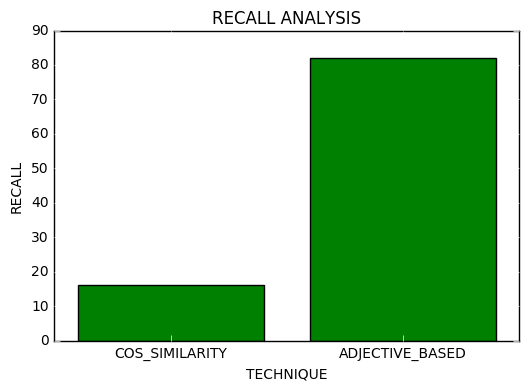

In [94]:
# 1) in terms of precision
#bar graph
import numpy as np
pos=np.arange(2)+1
years=["COS_SIMILARITY", "ADJECTIVE_BASED"]
plt.bar(pos,(cos_recall,adj_recall),align='center',color='green')
plt.xlabel('TECHNIQUE')
plt.ylabel('RECALL')
plt.title('RECALL ANALYSIS')
plt.tick_params(axis='x',color='white')
plt.tick_params(axis='y',color='white')
plt.xticks(pos,years)
plt.show()



In [1]:
cosine_fp = 600
cosine_tp = 4
cosine_fn = 104
cosine_tn = 1167